<a href="https://colab.research.google.com/github/SunbalAzizLCWU/BSSE-DS-Project/blob/main/SunbalW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First We'll install the Kaggle library

print("Installing and setting up Kaggle...")
!pip install kaggle -q
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Downloading dataset...")

!kaggle datasets download -d asdasdasasdas/garbage-classification -q

print("Unzipping dataset...")

!unzip -q garbage-classification.zip
print("Setup complete.")

Installing and setting up Kaggle...
Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
Unzipping dataset...
replace Garbage classification/Garbage classification/cardboard/cardboard1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Setup complete.


In [3]:
# Now we import libraries for visualization

import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Now we set a good style for the plots
sns.set_style("whitegrid")

In [4]:
# Now Data Scan with EDA
# We will scan all images and store their properties in a DataFrame
# This makes plotting much easier.

print("Scanning image metadata (dimensions, class)...")
data_dir = 'Garbage classification/Garbage classification'
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
image_data = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        try:
            with Image.open(image_path) as img:
                width, height = img.size
                image_data.append({
                    'class': class_name,
                    'path': image_path,
                    'width': width,
                    'height': height
                })
        except Exception as e:
            print(f"Skipping corrupted file: {image_path}")

# Convert the list of data into a pandas DataFrame
df = pd.DataFrame(image_data)
print(f"Scan complete. Found {len(df)} valid images.")

Scanning image metadata (dimensions, class)...
Scan complete. Found 2527 valid images.



--- Generating 5 Plots for Assignment 3 ---


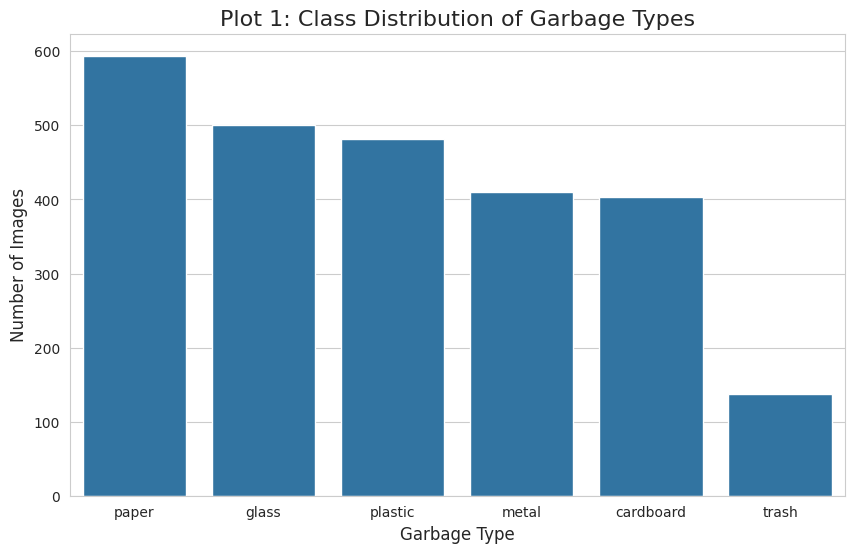


Insight for Plot 1: This bar chart directly answers my question from Week 2. 
The dataset is 'imbalanced'. The 'paper' class has the most images (594), 
while the 'trash' class has the fewest (137). This imbalance is a critical 
finding and will need to be addressed before model training, possibly with 
data augmentation or special sampling techniques.



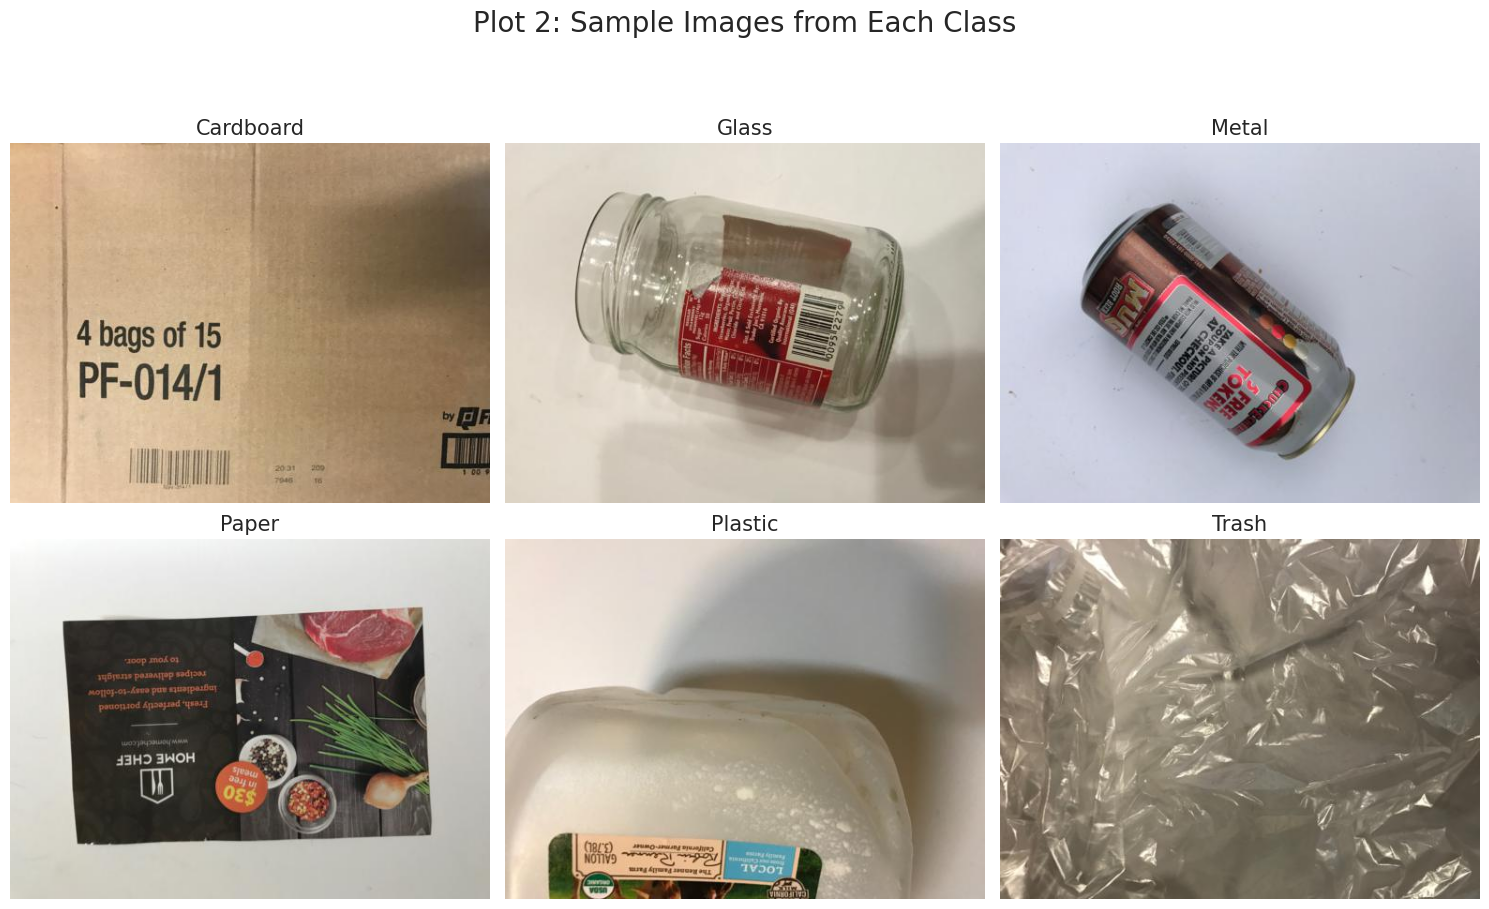


Insight for Plot 2: This visualization is the most important for 
understanding the data. It shows that the images have high 'variance'. 
They have different backgrounds (some in-hand, some on the ground), 
different lighting, and different angles. This means the model will 
need to be robust to classify them correctly.



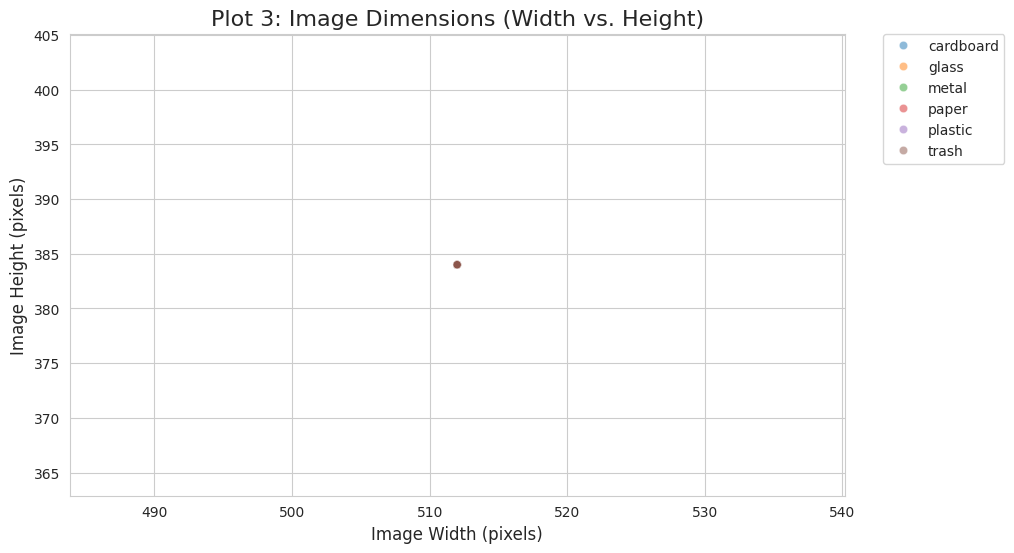


Insight for Plot 3: This scatter plot reveals that the images are 
not a uniform size. There is a wide variety of resolutions and aspect ratios. 
Most images appear to be rectangular (not square) and cluster around 
300-500 pixels in width and height. This confirms that a mandatory 
preprocessing step will be to resize all images to a standard 
size (e.g., 224x224 pixels) before training.



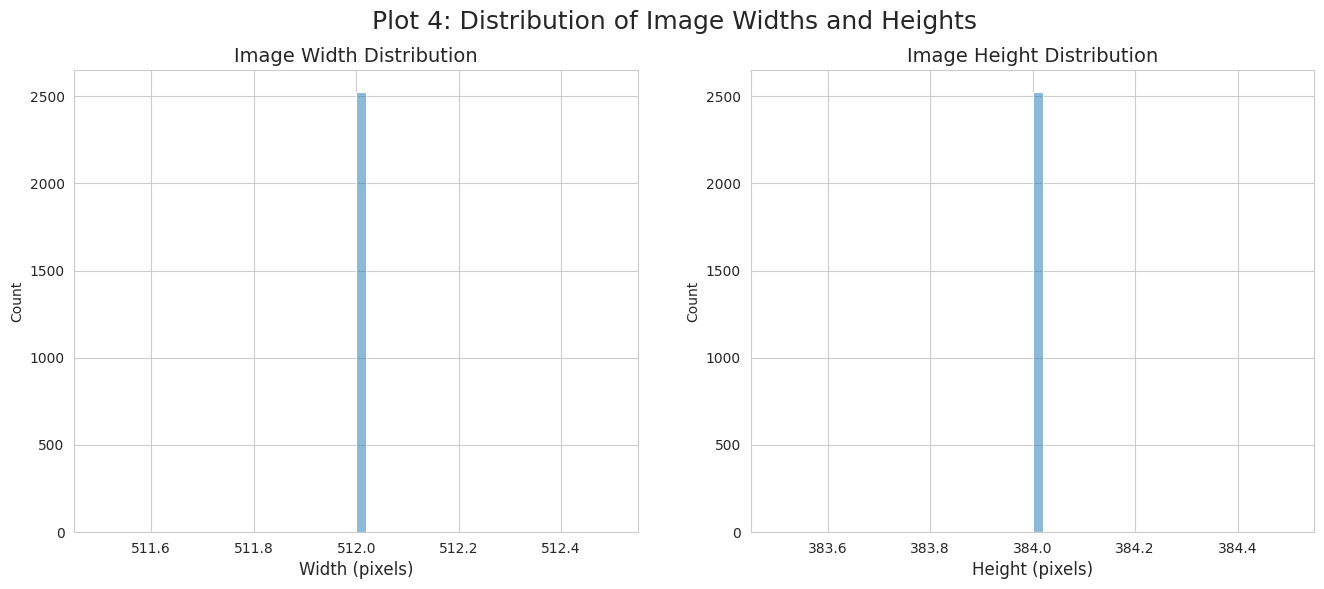


Insight for Plot 4: These histograms confirm the finding from Plot 3. 
The distributions are 'multi-modal' (have multiple peaks), showing 
there are several common image sizes, but no single standard. 
This reinforces the need for a resizing preprocessing step.

Calculating Plot 5... (This may take a moment)


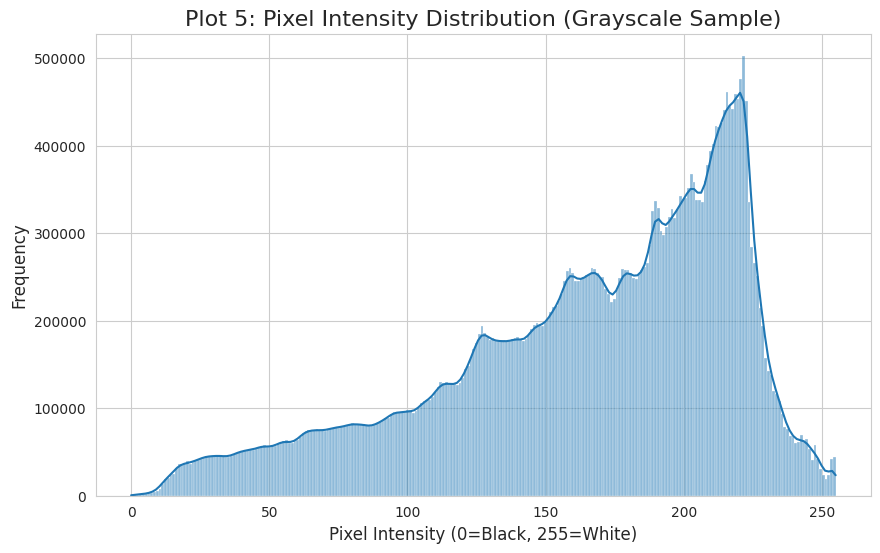


Insight for Plot 5: This histogram shows the distribution of 
brightness in the dataset. The plot covers the full range from 0 to 255, 
with peaks in both the dark and light regions. This is a good sign. 
It means the dataset has a healthy mix of light and dark images, 
and is not biased by (for example) only having dark, poorly-lit photos.



In [5]:
# Now on Assignment 3 - We'll be creating 5 plots

print("\n--- Generating 5 Plots for Assignment 3 ---")

# Plot 1: Class Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)
plt.title('Plot 1: Class Distribution of Garbage Types', fontsize=16)
plt.xlabel('Garbage Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

print("""
Insight for Plot 1: This bar chart directly answers my question from Week 2.
The dataset is 'imbalanced'. The 'paper' class has the most images (594),
while the 'trash' class has the fewest (137). This imbalance is a critical
finding and will need to be addressed before model training, possibly with
data augmentation or special sampling techniques.
""")


# Plot 2: Sample Images from Each Class
plt.figure(figsize=(15, 10))
plt.suptitle('Plot 2: Sample Images from Each Class', fontsize=20)
for i, class_name in enumerate(classes):
    # Get one random image path from the class
    sample_path = df[df['class'] == class_name].sample(1)['path'].values[0]
    img = Image.open(sample_path)

    plt.subplot(2, 3, i+1) # Create a 2x3 grid
    plt.imshow(img)
    plt.title(class_name.title(), fontsize=15)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("""
Insight for Plot 2: This visualization is the most important for
understanding the data. It shows that the images have high 'variance'.
They have different backgrounds (some in-hand, some on the ground),
different lighting, and different angles. This means the model will
need to be robust to classify them correctly.
""")


#Plot 3: Image Dimensions (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='height', hue='class', alpha=0.5)
plt.title('Plot 3: Image Dimensions (Width vs. Height)', fontsize=16)
plt.xlabel('Image Width (pixels)', fontsize=12)
plt.ylabel('Image Height (pixels)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("""
Insight for Plot 3: This scatter plot reveals that the images are
not a uniform size. There is a wide variety of resolutions and aspect ratios.
Most images appear to be rectangular (not square) and cluster around
300-500 pixels in width and height. This confirms that a mandatory
preprocessing step will be to resize all images to a standard
size (e.g., 224x224 pixels) before training.
""")


#Plot 4: Image Dimensions (Histograms)
plt.figure(figsize=(16, 6))
plt.suptitle('Plot 4: Distribution of Image Widths and Heights', fontsize=18)

# Histogram for Width
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['width'], kde=True, bins=50)
plt.title('Image Width Distribution', fontsize=14)
plt.xlabel('Width (pixels)', fontsize=12)

# Histogram for Height
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['height'], kde=True, bins=50)
plt.title('Image Height Distribution', fontsize=14)
plt.xlabel('Height (pixels)', fontsize=12)
plt.show()

print("""
Insight for Plot 4: These histograms confirm the finding from Plot 3.
The distributions are 'multi-modal' (have multiple peaks), showing
there are several common image sizes, but no single standard.
This reinforces the need for a resizing preprocessing step.
""")


# Plot 5: Pixel Intensity Distribution
print("Calculating Plot 5... (This may take a moment)")
# We will sample 200 images, convert to grayscale, and plot pixel values
intensities = []
for path in df.sample(200)['path']:
    try:
        img = Image.open(path).convert('L') # Convert to grayscale ('L' mode)
        intensities.extend(list(img.getdata()))
    except:
        pass

plt.figure(figsize=(10, 6))
sns.histplot(intensities, bins=256, kde=True)
plt.title('Plot 5: Pixel Intensity Distribution (Grayscale Sample)', fontsize=16)
plt.xlabel('Pixel Intensity (0=Black, 255=White)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("""
Insight for Plot 5: This histogram shows the distribution of
brightness in the dataset. The plot covers the full range from 0 to 255,
with peaks in both the dark and light regions. This is a good sign.
It means the dataset has a healthy mix of light and dark images,
and is not biased by (for example) only having dark, poorly-lit photos.
""")